In [ ]:
 %matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.optimize import minimize

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/Shareddrives/ADS2002 Portfolio Optimisation/Data/adjprice.csv")
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')
data.head()

,Date,0111145D US Equity,0202445Q US Equity,0203524D US Equity,0226226D US Equity,0376152D US Equity,0440296D US Equity,0544749D US Equity,0574018D US Equity,0598884D US Equity,...,YNR US Equity,YRCW US Equity,YUM US Equity,YUMC US Equity,ZBH US Equity,ZETHQ US Equity,ZION US Equity,ZRN US Equity,ZTS US Equity,ZTS-W US Equity
0,1993-09-07,13.2719,13.6829,8.4429,8.1042,11.000,57.3245,17.8887,6.8315,28.1246,...,NaN,144439.5121,NaN,NaN,NaN,6.875,7.1675,30.7970,NaN,NaN
1,1993-09-08,13.3263,13.5315,8.2147,7.9590,11.000,57.2096,17.8064,6.8315,27.5051,...,NaN,143691.1208,NaN,NaN,NaN,6.750,6.9766,30.0188,NaN,NaN
2,1993-09-09,13.7070,13.3800,8.7852,8.0627,11.125,59.1625,17.6831,6.8315,27.7529,...,NaN,143691.1208,NaN,NaN,NaN,6.625,6.9554,30.0188,NaN,NaN
3,1993-09-10,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN
4,1993-09-11,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN


In [ ]:
# looked at the performance for 2 years at a time
StartDate = "2017/01/01"
EndDate = "2019/01/01"

In [ ]:
stocks_short = data[(data["Date"] >= StartDate) & (data["Date"] <= EndDate)]
stocks_short.dropna(axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
stocks = stocks_short.columns[1:] # column 0 has the date, so drop that
stocks_return = stocks_short.iloc[-1,1:]/stocks_short.iloc[0,1:]-1 # last/first-1
# calcuate standard variation of time series and divide by first price
stocks_var = stocks_short.iloc[:,1:].std()/stocks_short.iloc[0,1:]
sharpe_ratio = stocks_return/stocks_var # return divided by variance

(-1.0, 4.0)

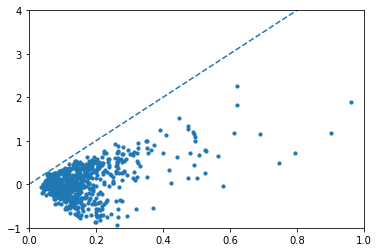

In [ ]:
plt.scatter(stocks_var,stocks_return, s=10)
plt.plot([0,1],[0,5],ls='--') # reference line of return = 5*std
plt.xlim([.0,1])
plt.ylim([-1,4])

Text(0.5, 1.0, 'Sharpe Ratio')

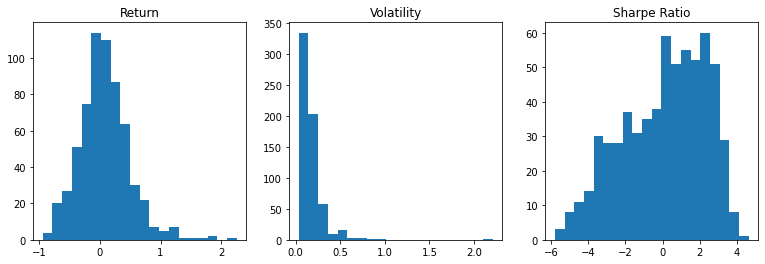

In [ ]:
 f, axs = plt.subplots(1, 3, figsize=(13,4))
axs[0].hist(stocks_return,20); # but the data in 20 bins
axs[0].set_title('Return')
axs[1].hist(stocks_var,20);
axs[1].set_title('Volatility')
axs[2].hist(sharpe_ratio,20);
axs[2].set_title('Sharpe Ratio')

In [ ]:
sharpe_ratio_sorted = pd.Series.sort_values(sharpe_ratio,ascending=False)
sharpe_ratio_sorted.head(20)

GHC US Equity     4.625595
CNP US Equity     4.012204
AVGO US Equity    3.913412
CHD US Equity      3.82528
AMT US Equity     3.792771
LLY US Equity     3.672143
NRG US Equity      3.62986
ABT US Equity     3.629758
AMGN US Equity    3.624183
YUM US Equity     3.565182
ES US Equity      3.500603
MCD US Equity     3.498623
COO US Equity     3.444121
AEP US Equity     3.406735
RHT US Equity     3.386831
AET US Equity     3.384169
MDT US Equity     3.358704
XEL US Equity     3.352347
MRK US Equity     3.347043
A US Equity        3.33621
dtype: object

In [ ]:
NSTOCKS = 20
# drop all the stocks with negative return and take a random sample of the remainder
stocks_return = stocks_return[stocks_return > 0].sample(n=NSTOCKS, random_state=42)

See if the monte carlo simulation can use a similar approach.

In [ ]:
# create a new dataframe with the first column being the dates
portfolio = pd.DataFrame(stocks_short['Date'],columns=['Date'])
# go through all the columns in our original data frame
for col in stocks_short.columns:
    # check if this column is in the names for our random sample
    if col in stocks_return.index:
        # if so, add the stock prices to the new dataframe
        portfolio = pd.concat([portfolio,stocks_short[col]],axis=1)

In [ ]:
daily_return = portfolio.iloc[:,1:].shift(axis=0)/portfolio.iloc[:,1:]-1
daily_return

,AIV US Equity,AVGO US Equity,BKNG US Equity,BLK US Equity,CMI US Equity,EHC US Equity,ES US Equity,ESS US Equity,FE US Equity,HFC US Equity,LDOS US Equity,LRCX US Equity,MOS US Equity,NWSA US Equity,PFE US Equity,PKG US Equity,RCL US Equity,SPGI US Equity,SWK US Equity,YUM US Equity
8517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8518,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8519,0.011348,-0.008803,-0.007790,-0.015242,-0.022318,-0.008653,0.002724,0.014203,0.000646,-0.024130,0.003731,-0.014264,-0.006775,-0.019677,-0.015756,-0.002117,-0.021819,-0.007842,-0.009162,0.001898
8520,-0.009258,0.007172,-0.006535,-0.000595,0.001144,-0.006923,-0.003439,-0.007708,-0.000646,-0.021282,-0.007790,-0.000559,-0.041545,-0.015161,-0.008711,-0.015861,-0.007456,-0.029980,-0.006264,-0.003625
8521,-0.001980,0.016009,-0.010913,0.010768,0.013648,0.009398,-0.000180,-0.007469,0.003889,0.016298,0.011422,0.002241,-0.001943,-0.001681,-0.009522,0.012187,-0.005882,-0.007549,-0.015805,-0.003299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9243,0.000921,-0.010805,0.001148,-0.001106,0.006989,0.003587,0.001702,-0.001453,-0.006173,0.010179,0.003052,-0.015803,0.025678,-0.003556,-0.002561,0.023810,-0.013328,0.004995,0.011197,-0.007095
9244,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9245,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9246,-0.009117,-0.002714,-0.003826,-0.011685,-0.014818,-0.010211,-0.005689,-0.004092,-0.007723,-0.000587,-0.006070,-0.005508,-0.013351,-0.008816,-0.015807,-0.013659,-0.017895,-0.009656,-0.007602,-0.003373


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


(20.5, -0.5)

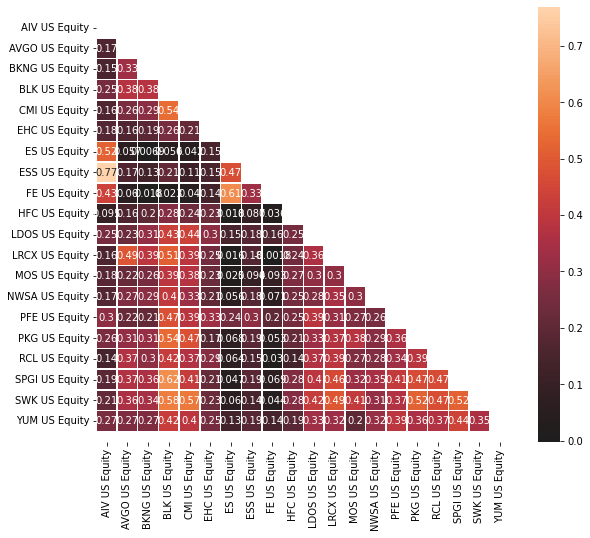

In [ ]:
corrs = daily_return.corr()
# create a mask to only show entries below the main diagonal
mask = np.triu(np.ones_like(corrs, dtype=np.bool))
f, ax = plt.subplots(figsize=(10, 8))
# plot the heatmap with a colour bar
sns.heatmap(corrs, mask=mask, center=0, annot=True, square=True, linewidths=.5)
# adjust the top and bottom, so that we can see the whole figure
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

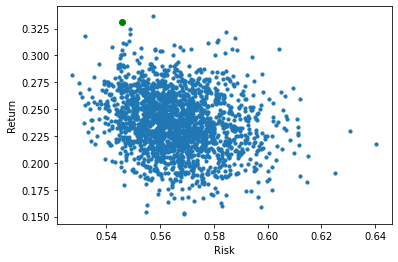

In [ ]:
NSAMP = 2000 # set the number of random samples of the weights
# create a numpy array to store the returns and risk for each sample
result_array = np.zeros((2, NSAMP))
Ro = portfolio.iloc[0,1:] # store the initial stock prices
R = portfolio.iloc[-1,1:]/Ro-1 # store the final stock prices
shmax = 0
wm = np.zeros(NSTOCKS)
Rm = 0
riskm = 0
for i in range(NSAMP): # loop over all the samples
    w = np.random.rand(NSTOCKS) # generates weights in the range [0,1] for all the stocks
    # calculate the initial value of the stock portfolio,
    # @ => multiply two matrices, .T => transpose of matrix
    Po = w.sum()
    w = w/Po # normalize random numbers so that portfolio has an initial value of 1
    Pf = w.T @ R # calculate final return of portfolio
    risk = np.sqrt(w.T @ corrs @ w) # use the formula above to calculate the risk
    result_array[:,i] = [risk,Pf] # store risk and return
    sh = Pf/risk
    if sh > shmax:
        shmax = sh
        wm = w
        Rm = Pf
        riskm = risk
# plot risk vs returns and add axis labels
plt.scatter(result_array[0,:],result_array[1,:], s=10)
# plot the sample with the highest return/risk
plt.scatter(riskm,Rm,color='g')
plt.xlabel('Risk')
plt.ylabel('Return');

NameError: ignored

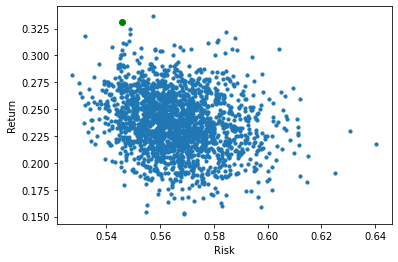

In [ ]:
# plot risk vs return again, so that we can overlay optimal portfolio values
plt.scatter(result_array[0,:],result_array[1,:], s=10)
plt.xlabel('Risk')
plt.ylabel('Return')
plt.plot(np.sqrt(wm.T @ corrs @ wm),np.dot(R,wm),'o',color='g')

# Ro = portfolio.iloc[0,1:]
# R = portfolio.iloc[-1,1:]
# generate a random sample of weights to be used as an initial guess
w = np.random.rand(NSTOCKS)
# loop over values of the risk measure logarithmically distributed from 10^{-2} to 10^2
for Q in np.logspace(-2,2,21):
    # define using lambda function the function to minimize: Variance-Q*Return
    portfolio_optimization = lambda w: w.T @ corrs @ w - Q*( w.T @ R )
    # define using lambda function the constraint that the initial value of the portfolio =1
    # the argument passed to minimize has to be a dict,
    # where the 'type' field defines whether it is
    # and equality ('eq') or inequality ('ineq') and the 'fun' field defines the function,
    # since we have equality, this gives w.T @ Ro - 1 = 0 => w.T @ Ro = 1
    portfolio_constraint = ({'type': 'eq', 'fun': lambda w: (w.sum())-1})
    # bounds is a (NSTOCKS,2) array which provides bounds of the variables
    # here we want all the weights to be positive,
    # so the lower bound is 0 and the upper bound is None
    # np.tile repeats the first argument as specified by the second argument,
    # here repeat the array
    # NSTOCKS time
    portfolio_bounds = np.tile((0,None),(NSTOCKS,1))
    # call the scipy function minimize with the first argument being the function to
    # minimize and the second
    # argument being an initial guess,
    # after the first step in the loop we use the last value of w as our initial guess,
    # as this is already normalized
    # in the second and third lines we specify the variable bounds and constraints
    x = minimize(portfolio_optimization, ws,
                             bounds=portfolio_bounds,
                             constraints=portfolio_constraint)
    # the values of the weights are stored in the x field, so we store these
    w = x.x
    # plot the risk and return with red circles
    plt.plot(np.sqrt(w.T @ corrs @ w),np.dot(R,w),'o',color='r')

# set axis limits
plt.xlim([.2,.6])
plt.ylim([.2,.6])
plt.plot([0,1.2],[0,1.4],ls='--') # reference line